<a href="https://colab.research.google.com/github/NattanunSunawin/Final/blob/main/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# จุดเสี่ยงอันตรายบนถนน

## โจทย์

จากข้อมูลอุบัติเหตุในกรุงเทพมหานครในปี 2019 ให้วิเคราะห์จุดเสี่ยงอันตรายบนถนนและแสดงลงบนแผนที่โดยใช้ jupyter notebook โดยให้ส่งคำตอบเป็น link ที่ให้อาจารย์ไปเปิดดูได้

ให้นิสิตเลือกเทคนิคที่เคยเรียนมาที่เหมาะสมเอง โดยให้นิสิตระวังหน่วยเมื่อนิสิตต้องมีการกำหนดตัวแปรที่เกี่ยวข้องกับระยะทาง (ข้อมูลที่ให้เป็น lat lon)


### ข้อกำหนด

* นิสิตสามารถ submit หลายครั้งได้ แต่ไม่สามารถ submit หลังหมดเวลาได้
* นิสิตสามารถเปิดเอกสารใด ๆ ก็ได้ แต่ห้ามติดต่อกันทุกรูปแบบ และห้ามใช้ social network ทุกชนิด (ให้ปิดโปรแกรม social network ให้หมด) หากจับได้จะได้ 0 ทันที
* นิสิตห้ามลอกข้อความจากเว็บไซต์หรือแหล่งข้อมูลอื่น ๆ หากพบจะให้คะแนนทั้งหมดเป็น 0 ทันที

### ขอความร่วมมือ

เมื่อนิสิตส่งคำตอบเรียบร้อยแล้วให้นิสิตประเมินผลรายวิชาใน https://www.cas.chula.ac.th/cas/? ด้วย (ไม่ต้อง submit ภายใน 3 ชั่วโมง)


6030807821
nattanun sunawin

In [3]:
!pip install folium

In [5]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/Maplub/accident_sample_bkk/main/event2019_BKK.csv')

In [6]:
data

,title,latitude,longitude
0,อุบัติเหตุ ถนนรัชดาภิเษก ขาเข้า,13.756988,100.565255
1,อุบัติเหตุ ถนนทางรถไฟเก่าสายปากน้ำ,13.717649,100.565232
2,อุบัติเหตุ ถนนเจริญกรุง ขาเข้า,13.728361,100.515878
3,อุบัติเหตุ กรุงเทพมหานคร,13.753568,100.580294
4,อุบัติเหตุ แยกคลองเตย,13.720805,100.557668
...,...,...,...
3061,อุบัติเหตุ ถนนเพชรบุรี,13.749695,100.548232
3062,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753643,100.580295
3063,อุบัติเหตุ ห้วยขวาง กรุงเทพมหานคร,13.753630,100.580293
3064,อุบัติเหตุ เจริญรัถ 8 (ซอยอยู่ดี),13.704420,100.516291


In [7]:
import folium as fo
longitude =  100.5538272857666
latitude = 13.734465925243732
station_map = fo.Map(
                location = [latitude, longitude], 
                zoom_start = 14)
latitudes = list(data.latitude)
longitudes = list(data.longitude)
labels = list(data.title)

for lat, lng, label in zip(latitudes, longitudes, labels):
    fo.Circle(
      location = [lat, lng],
      radius = 1,
      color = 'red' 
     ).add_to(station_map)
station_map

In [8]:
data2 = data[["longitude","latitude"]]
data2

,longitude,latitude
0,100.565255,13.756988
1,100.565232,13.717649
2,100.515878,13.728361
3,100.580294,13.753568
4,100.557668,13.720805
...,...,...
3061,100.548232,13.749695
3062,100.580295,13.753643
3063,100.580293,13.753630
3064,100.516291,13.704420


In [12]:
import seaborn
import matplotlib.pyplot as plt

In [14]:
pip install pointpats

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 2.4MB 7.1MB/s 
     |████████████████████████████████| 55.7MB 78kB/s 
  Created wheel for pointpats: filename=pointpats-2.2.0-cp36-none-any.whl size=60817 sha256=c7f81e89d88b4a01b2d88a0ea9bf4f0b989e18cc9bf9fcd45bbaaf3a8337f741
  Stored in directory: /root/.cache/pip/wheels/f9/28/f2/65c0993e68e25cef954ecd20abff91c6b11f0419f31b60e2ff
  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379082 sha256=867907ce9889eb7dacc642cde52c5a0002a48d1ade676d26b4fc17f01ffe181f
  Stored in directory: /root/.cache/pip/wheels/68/44/db/3d7a8b7d9ae5dba0cfcfb37f14e2a6e6f26b03557bdf1cf06d
Successfully built pointpats libpysal
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [15]:
from pointpats import PointPattern
import pandas as pd

/usr/local/lib/python3.6/dist-packages/libpysal/weights/util.py:20: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')


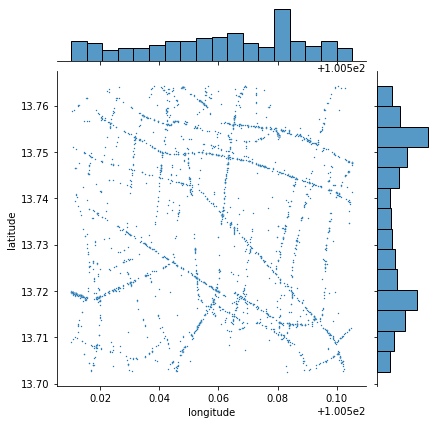

In [19]:
seaborn.jointplot(x='longitude', y='latitude', data=data2, s=2);

In [22]:
data2_loc = data2[['longitude','latitude']]

In [23]:
data2_loc.dropna(how='all', inplace=True)

In [24]:
data2_pt = PointPattern(data2_loc)

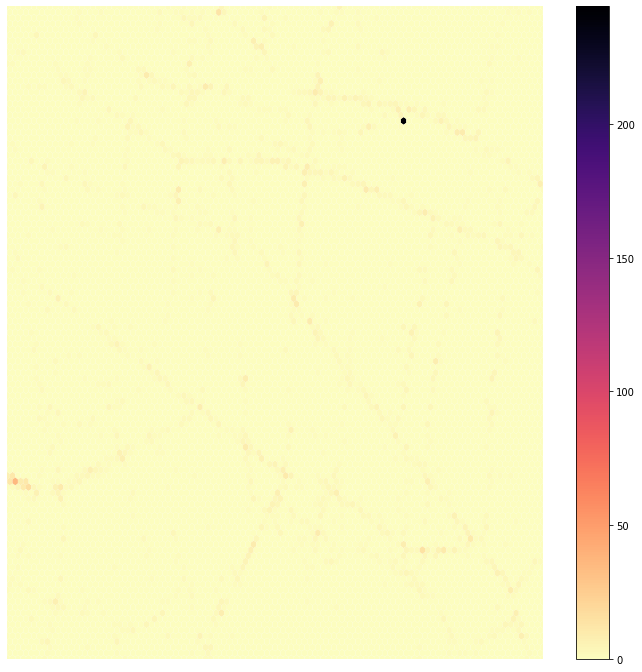

In [26]:
f, ax = plt.subplots(1, figsize=(12,12))
data_extent = [data2_pt.points.x.min(), data2_pt.points.x.max(), data2_pt.points.y.min(), data2_pt.points.y.max()]
hb = ax.hexbin(data2_pt.points['x'], data2_pt.points['y'],
               gridsize=100, linewidths=0,
               alpha=1, cmap='magma_r')
ax.axis(data_extent)
plt.colorbar(hb)
ax.set_axis_off()